### Números Aleatorios

En la unidad anterior se describio como primer paso de los experimentos de simulación, la selección de una fuente de números aleatorios y la obtención de los mismos. Por lo tanto, disponer de un buen generador de números aleatorios es fundamental en Simulación. De hecho, constituye también una parte fundamental en otras áreas, como la Informática (algoritmos aleatorizados, verificación de algoritmos, complejidad de algoritmos, criptografía, ...), la Estadística (métodos de muestreo y remuestreo, contrastes Montecarlo, Inferencia Bayesiana, ...), y, en general, en cualquier problema de cálculo científico que, de manera directa o indirecta, incluya algún elemento probabilístico incluyendo los juegos de video.

### ¿Porqué estudiar generadores de números aleatorios?

Actualmente existen multiples generadores de números aleatorios en diferentes entornos y compiladores lo cual supondría para un usuario de la Simulación que no es necesario su estudio. Sin embargo, estudios sobre algunos generadores comerciales sugieren que debemos actuar con cuidado con el uso de ellos. Incluso, el uso progresivo de modelos de simulación cada vez más detallados exige generadores de números aleatorios de mayor calidad.

### Defino el generador de aleatorios para aplicar las pruebas

Se usa un generador congruencial mixto. Los parámetros del primer generador: el multiplicador es $a=25214903917$ y $m=2^{48}-1$, usados por JAVA. 
Los parámetros del segundo generador: el multiplicador es $a=1103515245$, $m=2^{31}$ y un incremento $c=12345$, usados ANSI C

Además de eso, las semilla que se usa en cada generador es tomada de el valor en segundos y milisegundos del tiempo del sistema, lo que nos garantiza que dicha semilla no sea siempre la misma. Y para este trabajo los generadores devolveran una lista de $N$ aleatorios.

In [2]:
#Se importan algunas librerías que se necesitarán a la hora de generar variables aleatorias
import math as mt
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import time

N = 1000
#Tiempo del sistema en segundos (s), usada para el primer generador
Xn = time.time()
#Tiempo del sistema en milisegundos (ms) usada para el segundo generador
Xn_2 = time.time()*1000
        
def cong_mixto(N):
    global Xn
    r_lis = []
    a = 25214903917
    m = (2**48)-1
    for _ in range(0,N):
        Xn = (a*Xn + 1) % m
        Un = Xn/m
        r_lis.append(Un)
        
    return r_lis

def cong_mixto_2(N):
    global Xn_2
    r_lis = []
    a = 1103515245
    m = 2**31
    for _ in range(0,N):
        Xn_2 = (a*Xn_2 + 1) % m
        Un = Xn_2/m
        r_lis.append(Un)
        
    return r_lis

### Pruebas o contrastes empíricos

Normalmente, pasaremos un conjunto de pruebas cuando introduzcamos un nuevo generador, o cuando deseamos analizar si un generador del que desconozcamos su algoritmo subyacente es suficientemente bueno para nuestros propósitos.

### Constraste o prueba de Kolmogorov-Smirnov

Consideramos el caso en que $F_0$ es continua. La función de distribución empírica de una muestra $X_1, X_2,...,X_n$ se define como:

$$F_n(x)=\frac{\#\{X_{i}\leq x\}}{n}$$

Bajo la hipótesis nula $H_0:F_X(x)=F_0(x)$, esperamos que $F_n$ se aproxime a $F_0$. Definimos el estadístico bilateral de Kolmogorov-Smirnov

$$D_{n}=\underset{x\in\mathbb{R}}{\sup}\left|F_{n}(x)-F_{0}(x)\right|$$

La distribución exacta de $D_n$ está tabulada para valores seleccionados de $n\leq40$ y del nivel de significación $\alpha$. Para muestras grandes, se utiliza la distribución asintótica de $D_n$, que viene dada, para todo $z\leq0$, por

$$\underset{n\rightarrow\infty}{\lim}P(\sqrt{n}D_{n}\leq z)=L(z)=1-2\overset{\infty}{\underset{i=1}{\sum}}(-1)^{i-1}e^{-2i^{2}z^{2}}$$

$L(z)$ está tabulada y se comprueba que la aproximación es suficientemente buena para $n\geq35$. Intuitivamente, esperamos que $D_n$ sea pequeño cuando la hipótesis nula es cierta.
En nuestro caso particula de aleatoriedad, si $X_{(1)}<X_{(2)}<...<X_{(n)}$ designa al estadístico de orden, $F_0(x_{(i)})=x_{(i)}$, y como $F_n(x_{(i)})=i/n$, resulta:

$$D_{n}=\underset{i\leq i\leq n}{\max}\left\{ \max\left[\left|\frac{i}{n}-x_{(i)}\right|,\left|x_{(i)}-\frac{i-1}{n}\right|\right]\right\}$$

### Ejemplo

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


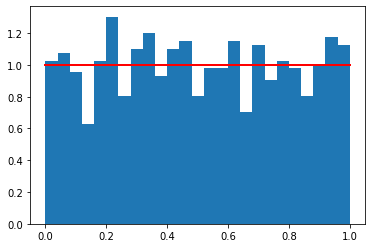

In [3]:
# Teoretical CDF for Uniform distribution F(x)
# Gerate random numbers with Uniform distribution f(x)
x = np.random.uniform(0,1,N)

# Plot empirical distribution f(x)
count, bins, ignored = plt.hist(x, 25, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [5]:
def cmp(x, u):
    global N
    x1 = np.arange(1/N,1+1/N,1/N)
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

    x2 = np.sort(x)
    y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

    De=np.absolute(y2-y1)
    print("De =",np.max(De))
    D,pvalue = stats.kstest(y2, 'uniform')
    print("KS test de python D =", D)

    # Plotting
    plt.plot(x1,y1,label='Uniform')
    plt.step(x2,y2,label='Random')
    x3 = [x1[De.argmax()],x1[De.argmax()]]
    y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
    
    plt.step(x3,y3,label='D')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Cumulative Probability P(X)')
    plt.ylim(0, 1.05)
    plt.show()

Generador congruencial mixto:
De = 0.24638025255375845
KS test de python D = 0.24638025255375812
Generador de numpy:
De = 0.2488841289183194
KS test de python D = 0.24888412891831907


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


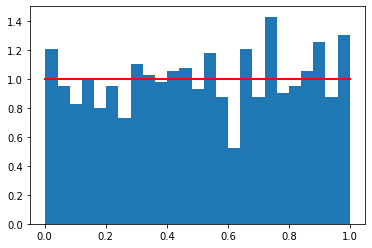

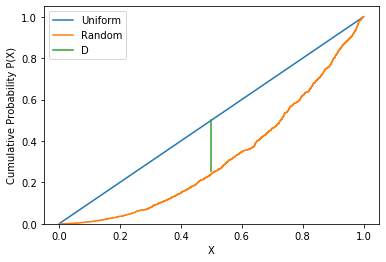

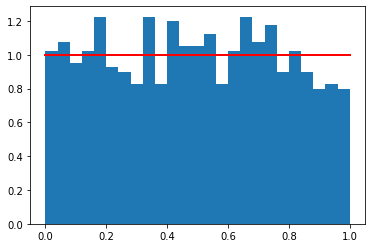

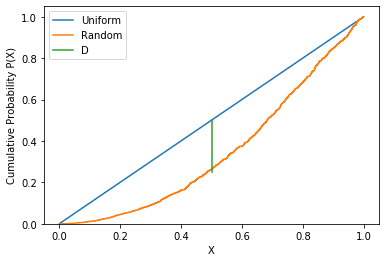

In [6]:
# scipy function for K-S test
def ks_test(x):
    global N
    # Teoretical CDF for Uniform distribution F(x)
    u = [1.0] * N

    # Plot empirical distribution f(x)
    count, bins, ignored = plt.hist(x, 25, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    plt.show()
    cmp(x, u)

print("Generador congruencial mixto:")
ks_test(cong_mixto_2(N))
print("Generador de numpy:")
ks_test(np.random.uniform(0,1,N))

### Contraste o prueba  $\chi^{2}$

La prueba $\chi^{2}$ es de bondad de ajuste. Es poco potente, por lo que permite justificar el rechazo de una hipótesis, pero proporciona escaso soporte a su aceptación. El problema de bondad de ajuste se plantea como sigue. Tenemos una muestra $X_1, X_2,...,X_n$ de una población con distribución $F_X(x)$ desconocida. Deseamos contrastar la hipótesis nula $H_0:F_X(x)=F_0(x)$, para todo $x\in\mathbb{R}$, donde $F_0(x)$ está completamente especificada, frente a la alternativa $H_1:F_X(x) \neq F_0(x)$ para algún $x$.
Para realizar el contraste, partimos el soporte de $X$ en $k$ subconjuntos o clases mutuamente excluyentes. Para cada subconjunto $i$, $i=1,...,k$, calculamos el número $f_i$ de observaciones que caen en la clase y el numero esperado de observaciones $e_i$ bajo la distribución hipotética $F_0$. El estadístico de la prueba es:

$$\chi^{2}=\overset{k}{\underset{i=1}{\sum}}\frac{(f_{i}-e_{i})^{2}}{e_{i}}$$

cuya distribución asintótica es una $\chi_{k-r-1}^{2}$, donde $r$ es el número de parámetros que se estiman a partir de las observaciones. La aproximación se considera aceptada si $\min\left\{ e_{i}>5\right\}$. Intuitivamente, el estadístico tiende a ser pequeño bajo la hipótesis nula, y grande cuando ésta es falsa, con lo qu ese deduce inmediatamente un contraste de hipótesis. La potencia del contraste crece con el número $k$ de subconjuntos considerados.

En nuestro problema de aleatoriedad, $F_0$ es la función de distribución de la uniforme en [0,1], con lo que $r=0$. Además, pueden cogerse $k$ subintervalos de [0,1] de igual longitud, con lo que $e_i=n/k$.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


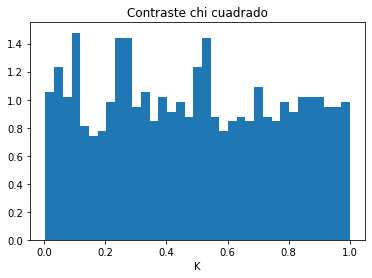

Chi cuadrado = 930.9124916983537


In [8]:
def contraste_chi_cuadrado(random):
    global N
    k = 35
    ez = N/k
    chi = 0
    
    p, spaces, fig = plt.hist(random, k, normed=True)
    plt.xlabel('K')
    plt.title('Contraste chi cuadrado')
    plt.show()
    
    for z in range(k):
        chi = chi + ((p[z] - ez) ** 2) / ez
    
    print("Chi cuadrado =", chi)

contraste_chi_cuadrado(cong_mixto(N))

### Constraste o prueba de rachas

Dada la sucesión de observaciones $X_1, X_2,...,X_n$, construimos la sucesión de simbolos binarios definida mediante 1 si $X_i<X_{i+1}$, 0 si $X_i>X_{i+1}$. Definimos  racha creciente (decreciente) de longitud $l$ a un grupo seguido de $l$ números 1 (ó 0). Contabilizamos el número de rachas. Sabemos que su distribución asintótica, bajo la hipótesis nula de aleatoriedad, es:

$$N\left(\frac{2n-1}{3},\frac{16n-29}{90}\right)$$

Intuitivamente, rechazamos la aleatoriedad con un número muy pequeño o muy grande de rachas. De ahí se obtiene inmediatamente la prueba.

In [9]:
def rachas_test(random):
    rachas = []
    
    for i in range(1, N):
        #Identificador de el tipo de rachas
        c = 0
        if random[i-1] < random[i]:
            c = 1
        rachas.append(c)
    
    #Grafico las cantidad de ambas ranchas en un histograma
    r_i, intervalos, fig = plt.hist(rachas, 2, normed=True)
    plt.title('Cantidad de Rachas')
    plt.clf()
    
    #Número inicial de rachas
    R = 1
    aux = rachas[0]
    
    for i in range(1, len(rachas)):
        if rachas[i] != aux:
            R = R + 1
            aux = rachas[i]
            
    n = len(random)
    Z = (R - (2*n - 1)/3) / (mt.sqrt((16*n - 29) / 90))
    print(" ")
    print("Resultados test de rachas:")
    print("Número de rachas =", R)
    print("Estadístico Z =", Z)

rachas_test(cong_mixto(N))

 
Resultados test de rachas:
Número de rachas = 641
Estadístico Z = -1.9017242192148398


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

### Contraste de rachas por encima y por debajo de la mediana

Otro procedimiento para definir rachas se tiene del recuento de observaciones que se sitúan a un mismo lado de la mediana. La distribución asintótica del número de rachas, bajo la hipótesis de aleatoriedad, es:

$$N\left(1+\frac{n}{2},\frac{n}{2}\right)$$

de donde se sigue, inmediatamente una prueba.

### Contraste o prueba de permutaciones

Separamos las observaciones en $k$-uplas:

$$(U_1,U_2,...,U_k),...,(U_{ik+1},U_{ik+2},...,U_{(i+1)k}),...$$

La $k$-upla general se escribe:

$$(U_{ik+j})_{j=1}^k$$

La ordenamos crecientemente y consideramos la ordenación correspondiente de los subíndices $j$. Bajo la hipótesis de que la probabilidad de que dos números sean iguales es nula, hay $k!$ ordenaciones posibles. Bajo la hipótesis de independencia, todas las permutaciones son equiprobables, con probabilidad $1/k!$. Entonces es inmediato aplicar una prueba $\chi^2$ con $k!$ clases, distribución asintótica $\chi_{k!-1}^2$, frecuencias esperadas $r/k!$, onde $r$ es el número de $k$-uplas y frecuencias observadas el número de veces que aparece cada ordenación.

### Contraste o prueba de huecos

Fijamos dos valores $\alpha$ y $\beta$ con $0<\alpha<\beta<1$. La sucesión presenta un hueco de longitud $m$ si $U_j, U_{j+m}\in\left[\alpha,\beta\right]$ pero $U_{j+1},...,U_{j+m+1}\notin\left[\alpha,\beta\right]$. Bajo la hipótesis de aleatoriedad de la serie, la longitud $m$ de los huecos sigue una distribución geométrica de parámetro $P(\alpha\leq X_{j}\leq\beta)=\beta-\alpha=\rho$, es decir:

$$P(hueco\: longitud\: m)=\rho(1-\rho)^{m-1}$$.

La hipótesis de aleatoriedad implica independencia de las longitudes de los huecos y podemos aplicar una prueba $\chi^2$ basado en las comparacioens de los números observados y esperados de huecos de longitud $m$.

### Repetición de contrastes o pruebas

Para aumentar su potencia, los contrastes anteriores pueden repetirse $N$ veces. La distribución empírica de los valores del estadístico pueden compararse con su distribución teórica mediante, por ejemplo, el contraste de Kolmogorov-Smirnov.

### T4: Taller 4. Taller contrastes de números aleatorios

* Tomando como base éste Notebook, implementar los contrastes o pruebas de Kolmogorov-Smirnov, $\chi^2$, rachas, permutaciones y huecos en la sección correspondiente para evaluar la calidad de cualquier secuencia de números obtenidas por un generador de números aleatorios $U(0,1)$ utilizando tanto el generador de numpy como el implementado por Ud previamente.
* Evaluar la calidad de los siguientes generadores de números aleatorios usando las pruebas implementadas en el punto anterior:
    * RANDU $x_{i+1}=65539 x_i \mod 2^{31}$
    * Sinclair ZX81 $x_{i+1}=75 x_i \mod (2^{16}+1)$
    * Numerical reciepes $x_{i+1}= 1664525 x_i + 1013904223 \mod 2^{32}$
    * Borland C/C++ $x_{i+1}= 22695477 x_i + 1 \mod 2^{32}$

### Solucion 

RANDU $x_{i+1}=65539 x_i \mod 2^{31}$

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


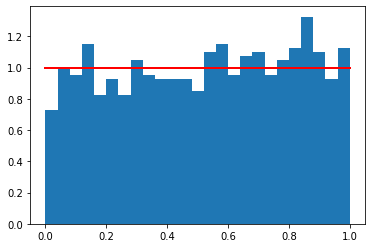

De = 0.24000305742682684
KS test de python D = 0.24000305742682645
Chi cuadrado = 931.1802895308294
 
Resultados test de rachas:
Número de rachas = 685
Estadístico Z = 1.4012704773161928
----------------------------------


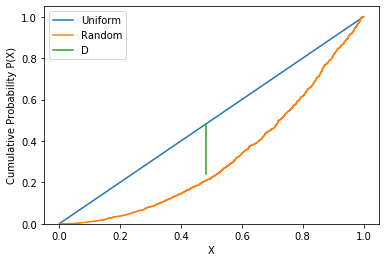

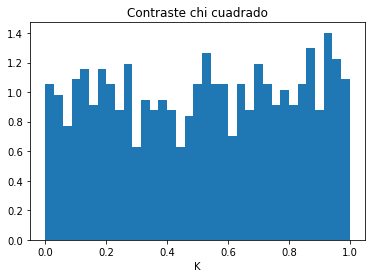

<Figure size 432x288 with 0 Axes>

In [10]:
def Randu(N):
    global Xn
    r_lis = []
    a = 65539
    m = 2**31
    
    for _ in range(0,N):
        Xn = (a*Xn + 0) % m
        Un = Xn/m
        r_lis.append(Un)
        
    return r_lis

#Uniformidad
ks_test(Randu(N))
contraste_chi_cuadrado(Randu(N))

#Aleatoriedad
rachas_test(Randu(N))
print("----------------------------------")

Sinclair ZX81 $x_{i+1}=75 x_i \mod (2^{16}+1)$

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


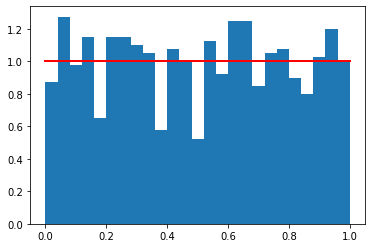

De = 0.254649735802678
KS test de python D = 0.25464973580267763
Chi cuadrado = 931.126584047685
 
Resultados test de rachas:
Número de rachas = 669
Estadístico Z = 0.20018149675945368
----------------------------------


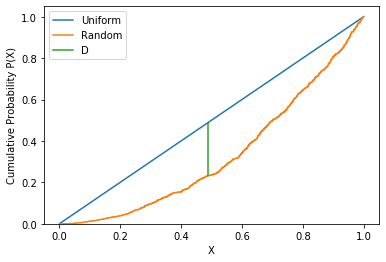

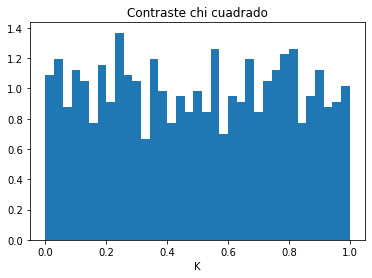

<Figure size 432x288 with 0 Axes>

In [11]:
def Sinclair(N):
    global Xn
    r_lis = []
    a = 75
    m = 2**16 + 1
    
    for _ in range(0,N):
        Xn = (a*Xn + 0) % m
        Un = Xn/m
        r_lis.append(Un)
        
    return r_lis

#Uniformidad
ks_test(Sinclair(N))
contraste_chi_cuadrado(Sinclair(N))

#Aleatoriedad
rachas_test(Sinclair(N))
print("----------------------------------")

Numerical recipes $x_{i+1}= 1664525 x_i + 1013904223 \mod 2^{32}$

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


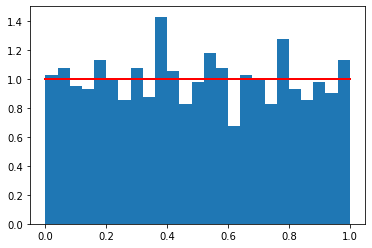

De = 0.2511060836166406
KS test de python D = 0.2511060836166403
Chi cuadrado = 931.0913999945
 
Resultados test de rachas:
Número de rachas = 670
Estadístico Z = 0.2752495580442499
----------------------------------


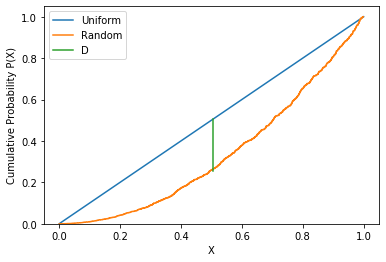

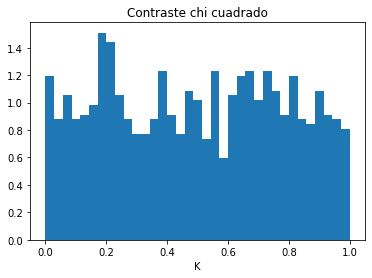

<Figure size 432x288 with 0 Axes>

In [12]:
def n_recipes(N):
    global Xn
    r_lis = []
    a = 1664525
    m = 2**32
    
    for _ in range(0,N):
        Xn = (a*Xn + 1013904223) % m
        Un = Xn/m
        r_lis.append(Un)
        
    return r_lis

#Uniformidad
ks_test(n_recipes(N))
contraste_chi_cuadrado(n_recipes(N))

#Aleatoriedad
rachas_test(n_recipes(N))
print("----------------------------------")

Borland C/C++ $x_{i+1}= 22695477 x_i + 1 \mod 2^{32}$

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


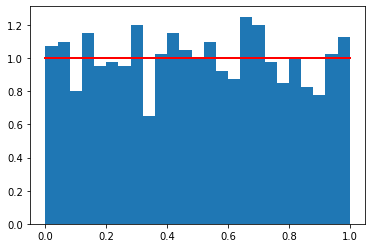

De = 0.25074226599798655
KS test de python D = 0.2507422659979861
Chi cuadrado = 931.1369265085452
 
Resultados test de rachas:
Número de rachas = 694
Estadístico Z = 2.0768830288793585
----------------------------------


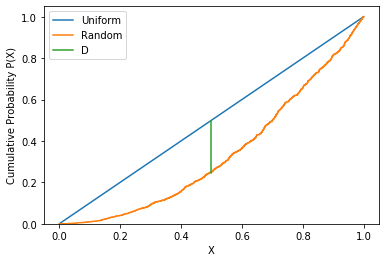

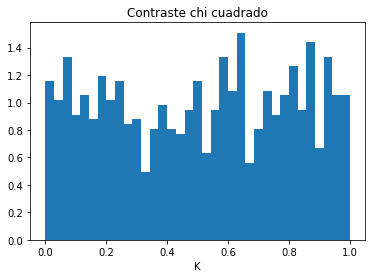

<Figure size 432x288 with 0 Axes>

In [13]:
def Borland(N):
    global Xn
    r_lis = []
    a = 22695477
    m = 2**32
    
    for _ in range(0,N):
        Xn = (a*Xn + 1) % m
        Un = Xn/m
        r_lis.append(Un)
        
    return r_lis

#Uniformidad
ks_test(Borland(N))
contraste_chi_cuadrado(Borland(N))

#Aleatoriedad
rachas_test(Borland(N))
print("----------------------------------")

# Referencias

[Ríos, Ríos & Martín, 2000] David Ríos, Sixto Ríos, Jacinto Martín. Simulación, Métodos y aplicaciones. Editorial Alfaomega, 2000.